In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os 
os.chdir('C:/Users/viswanath_thatha/Downloads')

In [3]:
train=pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
test=pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

In [4]:
train_original=train.copy()
test_original=test.copy()

In [25]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [27]:
cols = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

In [30]:
#Univariate Analysis -- simplest form of analysing the data where we examine each variable individually. For categorical Features
#we can use frequency table or bar plots which will calculate the number of each category in a particular variable
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [31]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

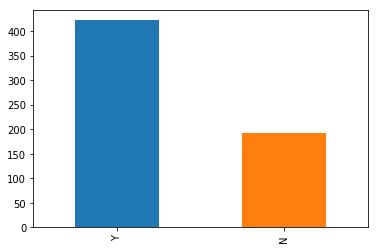

In [33]:
train['Loan_Status'].value_counts().plot.bar()

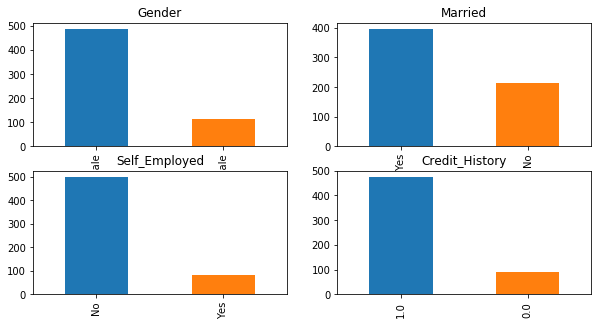

In [41]:
plt.subplot(221)
train['Gender'].value_counts().plot.bar(figsize=(10,5),title='Gender')
plt.subplot(222)
train['Married'].value_counts().plot.bar(figsize=(10,5),title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts().plot.bar(figsize=(10,5),title='Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts().plot.bar(figsize=(10,5),title='Credit_History')
plt.show()

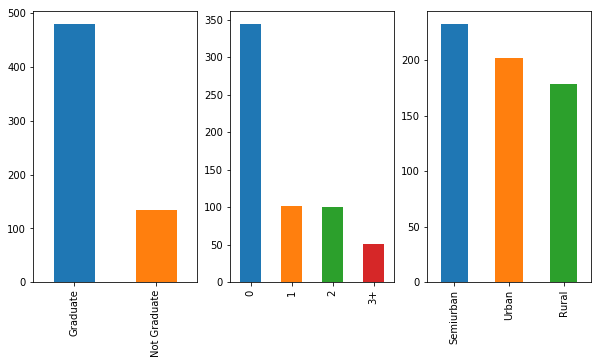

In [44]:
#Ordinal 
plt.subplot(131)
train['Education'].value_counts().plot.bar(figsize=(10,5))
plt.subplot(132)
train['Dependents'].value_counts().plot.bar(figsize=(10,5))
plt.subplot(133)
train['Property_Area'].value_counts().plot.bar(figsize=(10,5))

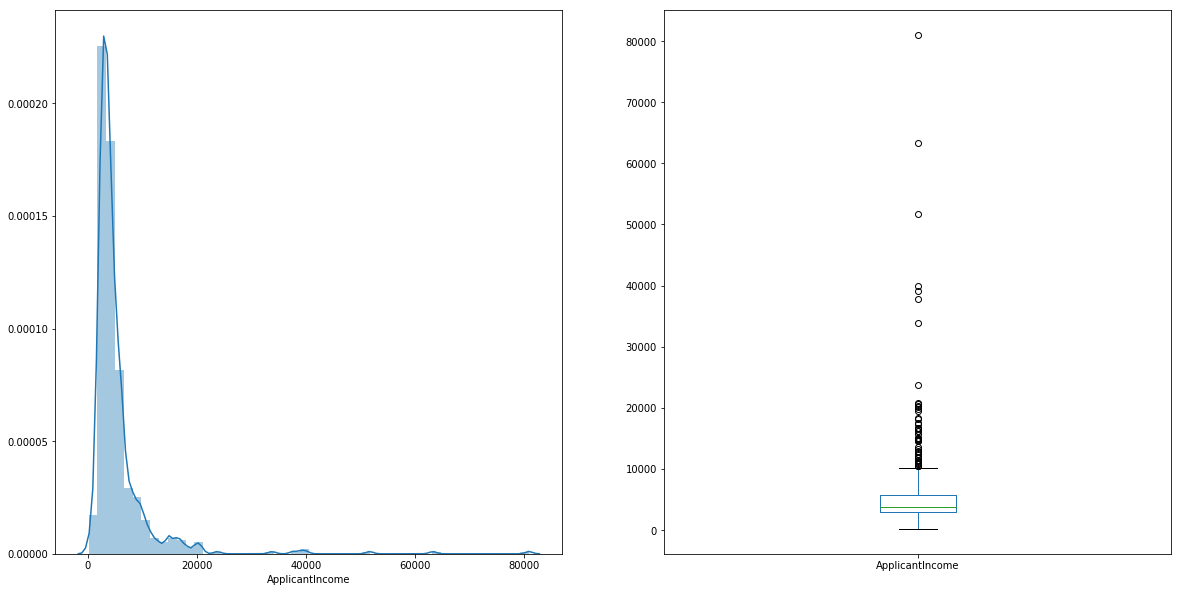

In [53]:
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(20,10))

Text(0.5,0.98,'')

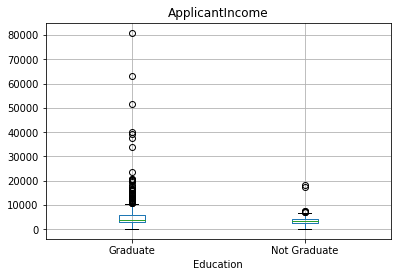

In [62]:

train.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle("")

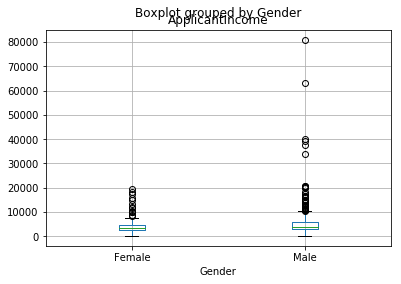

In [63]:
train.boxplot(column='ApplicantIncome', by='Gender')

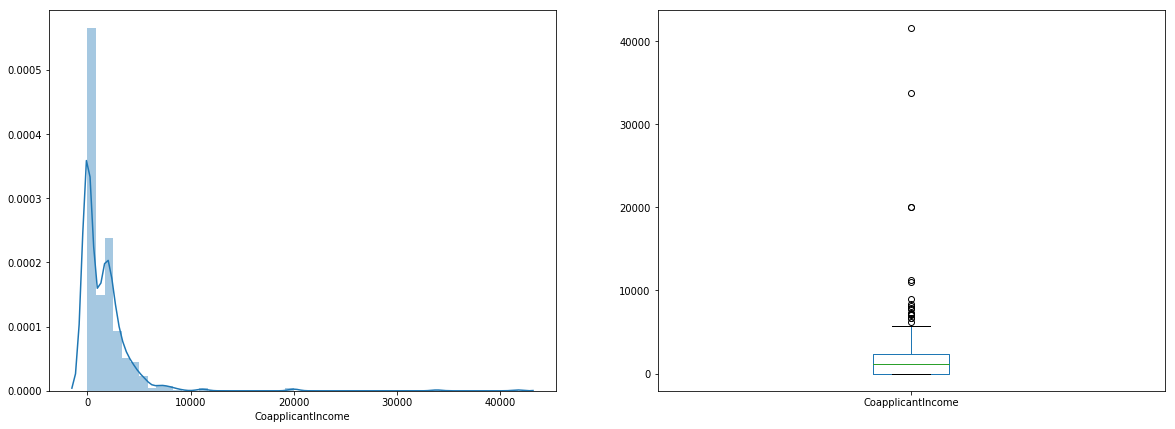

In [138]:
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train.CoapplicantIncome.plot.box(figsize=(20,7))

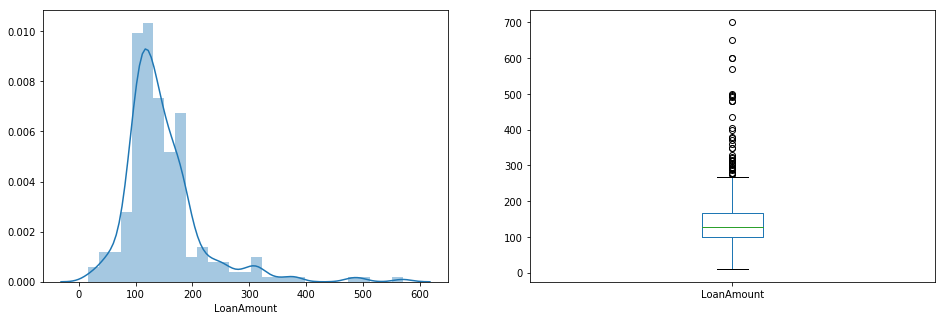

In [139]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount']);
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

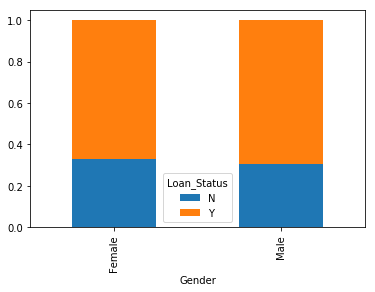

In [140]:
#BiVariate Analysis -- represent with respect to target variable
#Categorical independent variable vs target variable (Dependent Variable)
Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1),axis=0).plot.bar(stacked=True)

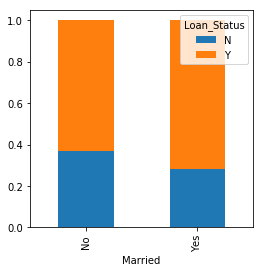

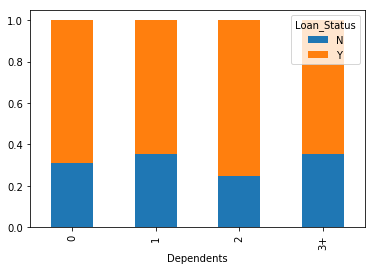

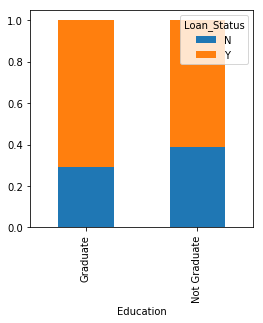

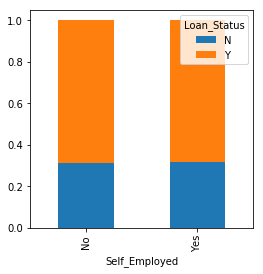

In [141]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])

Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

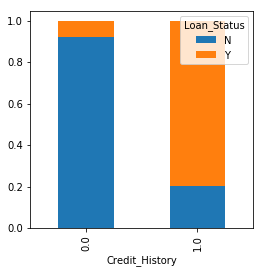

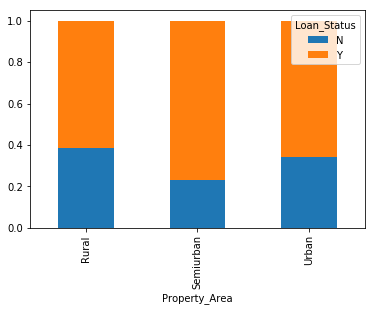

In [142]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

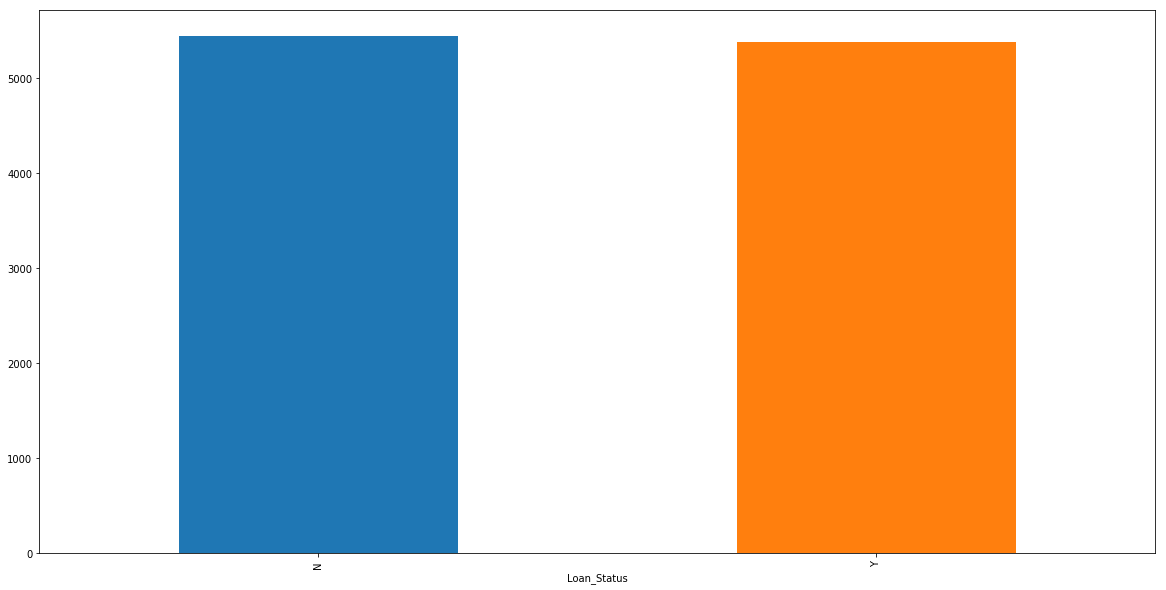

In [143]:
#Numerical Independent variable vs Target Variable
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar(figsize=(20,10))

In [144]:
train['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [145]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)

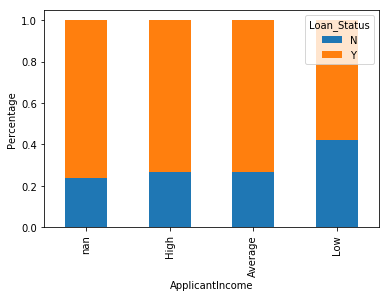

In [146]:
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

In [147]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=group)

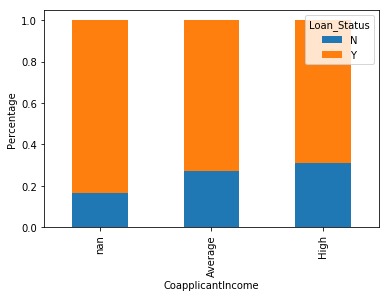

In [148]:
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

In [149]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

In [150]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)

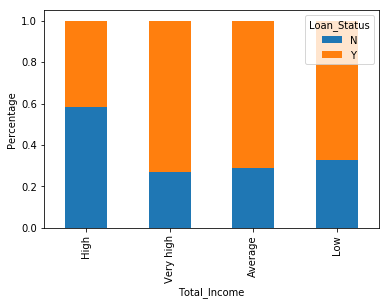

In [151]:
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

In [152]:
train.LoanAmount.describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [158]:
bins = [0,100,200,700]
group = ['Low','Average','High']
train['LoanAmount_bin'] = pd.cut(df['LoanAmount'],bins,labels=group)

Text(0,0.5,'Percentage')

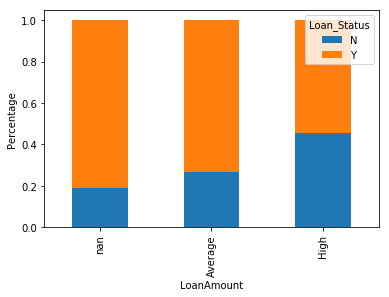

In [159]:
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1),axis=0).plot.bar(stacked=True)
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')

In [160]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [161]:
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

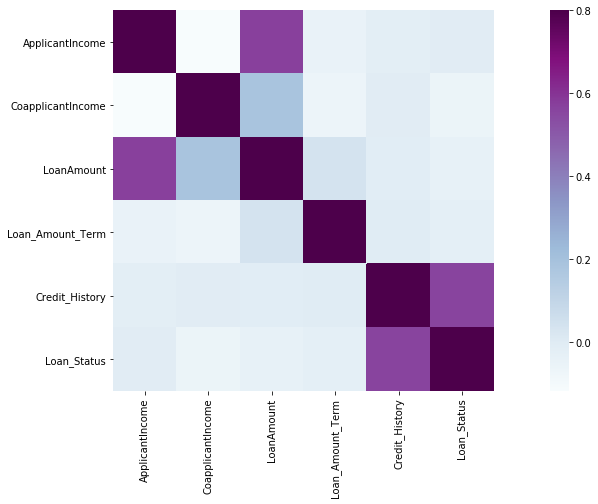

In [176]:
#Finding Correlation
matrix = train.corr()
plt.subplots(figsize=(20,7))
sns.heatmap(matrix,vmax=0.8,cmap='BuPu',square=True)

In [177]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [183]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [186]:
train['Loan_Amount_Term'].value_counts()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [187]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [188]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [189]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [190]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

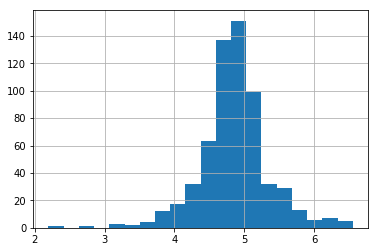

In [194]:
train['LoanAmount_Log'] = np.log(train['LoanAmount'])
train['LoanAmount_Log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [195]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null int64
LoanAmount_Log       614 non-null float64
dtypes: float64(5), int64(2), object(7)
memory usage: 67.2+ KB


In [196]:
train = train.drop('Loan_ID',axis=1)
test = test.drop('Loan_ID',axis=1)

In [271]:
X = train.drop('Loan_Status',axis=1)
y = train.Loan_Status

In [203]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [204]:
from sklearn.model_selection import train_test_split

In [205]:
X_train, X_cv, y_train, y_cv = train_test_split(X,y,test_size=0.3)

In [206]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [207]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [209]:
pred_cv = model.predict(X_cv)

In [210]:
accuracy_score(y_cv,pred_cv)

0.8

In [211]:
pred_test = model.predict(test)

In [212]:
submission=pd.read_csv("Sample_Submission_ZAuTl8O_FK3zQHh.csv")

In [213]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

Series([], Name: Loan_Status, dtype: object)

In [215]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

In [217]:
from sklearn.model_selection import KFold

In [231]:
from sklearn.model_selection import StratifiedKFold

In [274]:
i = 1
kf = StratifiedKFold(n_splits = 5,random_state=1,shuffle=True)
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy score:', score)
    i += 1 
pred_test = model.predict(test)
pred = model.predict_proba(xvl)[:,1]
    


1 of kfold 5
accuracy score: 0.8064516129032258

2 of kfold 5
accuracy score: 0.8225806451612904

3 of kfold 5
accuracy score: 0.7786885245901639

4 of kfold 5
accuracy score: 0.7868852459016393

5 of kfold 5
accuracy score: 0.819672131147541


ValueError: X has 20 features per sample; expecting 21

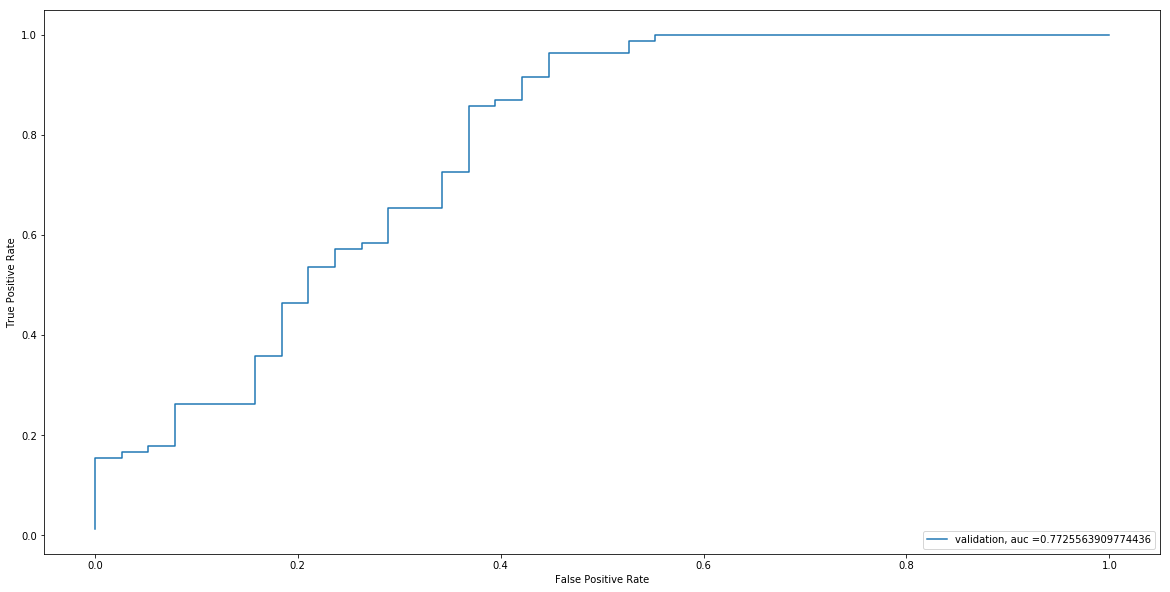

In [246]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(20,10))
plt.plot(fpr,tpr,label='validation, auc =' +str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [247]:
submission['Loan_Status'] = pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [248]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [249]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Logistic.csv')

In [250]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

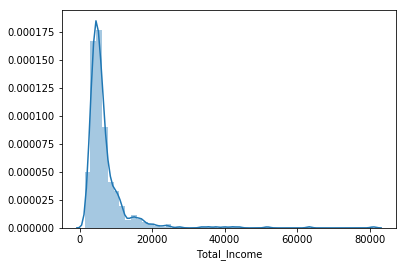

In [251]:
sns.distplot(train['Total_Income'])

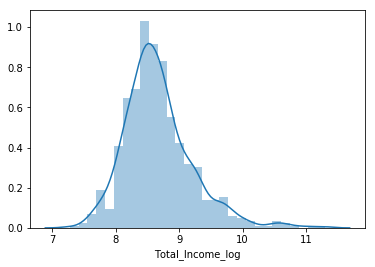

In [291]:
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log'])
test['Total_Income_log'] = np.log(test['Total_Income'])

In [255]:
train['EMI'] = train['LoanAmount']/train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount']/test['Loan_Amount_Term']

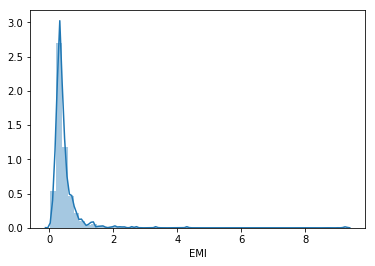

In [256]:
sns.distplot(train['EMI'])

In [258]:
train['Balance_Income'] = train['Total_Income'] - train['EMI']*1000
test['Balance_Income'] = test['Total_Income'] - test['EMI']*1000

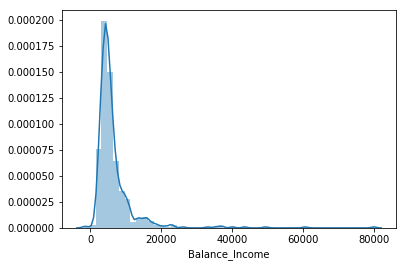

In [259]:
sns.distplot(train['Balance_Income'])

In [262]:
#Dropping the columns from which we have created new features
#train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
#test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [282]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status                # Save target variable in separate dataset

In [293]:
i = 1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index], X.loc[test_index]
    ytr,yvl = y[train_index], y[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy score:', score)
    i += 1 
pred_test = model.predict(test)
pred = model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy score: 0.8064516129032258

2 of kfold 5
accuracy score: 0.8225806451612904

3 of kfold 5
accuracy score: 0.7786885245901639

4 of kfold 5
accuracy score: 0.7868852459016393

5 of kfold 5
accuracy score: 0.819672131147541


In [287]:
X.columns

Index(['Credit_History', 'LoanAmount_Log', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_3', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Total_Income', 'Total_Income_log', 'EMI', 'Balance_Income'],
      dtype='object')

In [289]:
from sklearn import tree

In [303]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status                # Save target variable in separate dataset

In [311]:
i = 1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index], X.loc[test_index]
    ytr,yvl = y[train_index], y[test_index]
    
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy score:', score)
    i += 1
pred_test = model.predict(test)


1 of kfold 5
accuracy score: 0.7258064516129032

2 of kfold 5
accuracy score: 0.7419354838709677

3 of kfold 5
accuracy score: 0.7049180327868853

4 of kfold 5
accuracy score: 0.680327868852459

5 of kfold 5
accuracy score: 0.7049180327868853


In [312]:
from sklearn.ensemble import RandomForestClassifier

In [313]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr, xvl = X.loc[train_index],X.loc[test_index]
    ytr, yvl = y[train_index],y[test_index]
    
    model = RandomForestClassifier(random_state=1,max_depth=10)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy score:', score)
    i+=1
pred_test = model.predict(test)


1 of kfold 5
accuracy score: 0.8225806451612904

2 of kfold 5
accuracy score: 0.8145161290322581

3 of kfold 5
accuracy score: 0.7377049180327869

4 of kfold 5
accuracy score: 0.7295081967213115

5 of kfold 5
accuracy score: 0.8114754098360656


In [314]:
from sklearn.model_selection import GridSearchCV

In [315]:
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

In [316]:
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [318]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)

In [319]:
# Fit the grid search model
grid_search.fit(x_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [320]:
# Estimating the optimized value
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=141, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [321]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
pred_test = model.predict(test)
pred2=model.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8225806451612904

3 of kfold 5
accuracy_score 0.8032786885245902

4 of kfold 5
accuracy_score 0.7786885245901639

5 of kfold 5
accuracy_score 0.819672131147541


In [322]:
submission['Loan_Status']=pred_test            # filling Loan_Status with predictions
submission['Loan_ID']=test_original['Loan_ID'] # filling Loan_ID with test Loan_ID

In [323]:
# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [324]:
# Converting submission file to .csv format
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Random Forest.csv')

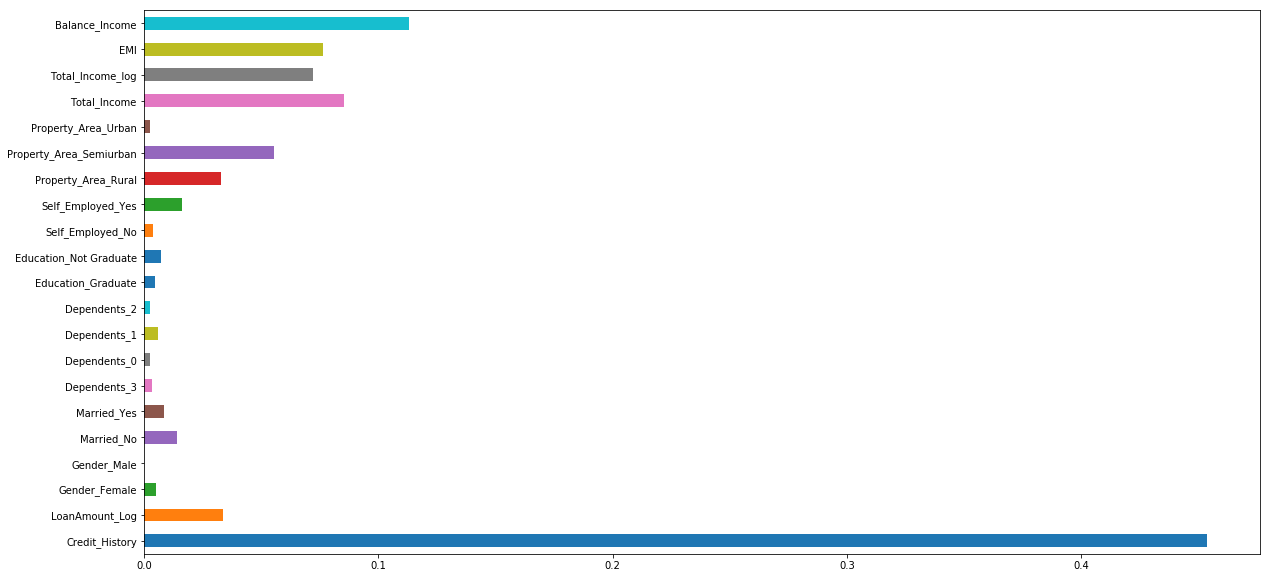

In [328]:
importances = pd.Series(model.feature_importances_,index=X.columns)
importances.plot.barh(figsize=(20,10))